In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("C:\\Users\\Krishna\\Desktop\\dataset\\diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
x=df.drop(columns="Outcome")
y=df["Outcome"]

In [4]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=0)

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

In [6]:
le=LogisticRegression()
knn=KNeighborsClassifier(n_neighbors=5)
svm=SVC(C=1)
GNB=GaussianNB()
models={"Logistic":le,"Knn":knn,"SVM":svm,"GNB":GNB}

In [7]:
from sklearn.metrics import accuracy_score

In [8]:
accuracy=[]
for name,model in models.items():
    model.fit(xtrain,ytrain)
    ypred=model.predict(xtest)
    acc=accuracy_score(ytest,ypred)
    accuracy.append(acc)
    print("For {} the accuracy is {}".format(name,acc))

C:\Users\Krishna\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


For Logistic the accuracy is 0.8246753246753247
For Knn the accuracy is 0.7532467532467533
For SVM the accuracy is 0.7922077922077922
For GNB the accuracy is 0.7922077922077922


<BarContainer object of 4 artists>

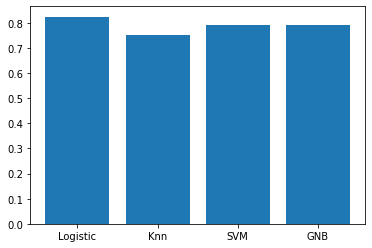

In [9]:
plt.bar(models.keys(),accuracy)